##  Análisis Exploratorio Inicial

## Proyecto:  <span style="color:green"> Recarga Telefónica  </span>

### Versión de Python

La versión de python utilizada ha sido la 3.7.7

In [1]:
from platform import python_version
print(python_version())

3.7.6


### Librerías a utilizar

- `Datetime`: El módulo proporciona clases para manipular fechas y horas de manera simple y compleja.

- `Pandas`: Se utiliza para operaciones y manipulaciones de datos estructurados. Es muy habitual usarlo en la fase de depuración y preparación de los datos. (Versión 0.25.1)

- `NumPy` : Acrónimo de  Numerical Python. Su características más potente es que puede trabajar con matrices (array) de n dimensiones así como también ofrece funciones básicas de algebra lineal. (Versión 1.17.2)

- `Matplotlib`: es una librería de gráficos, desde histogramas, hasta gráficos de líneas o mapas de calor. (Versión 3.1.1)

- `Seaborn`: Basada en Matplotlib, se usa para hacer más atractivos los gráficos e información estadística en Python. Su objetivo es darle una mayor relevancia a las visualizaciones, dentro  de las tareas de exploración e interpretación de los datos.

- `Scikit Learn (Sklearn)` para machine learning: Construida sobre NumPy, SciPy y Matplotlib, esta librería contiene un gran número de eficientes herramientas para machine learning y modelado estadístico, como por ejemplo, algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad. (Versión 0.9.0)

- `XGBoost`:  Es una biblioteca optimizada de aumento de gradiente distribuido diseñada para ser altamente eficiente , flexible y portátil . Implementa algoritmos de aprendizaje automático en el marco Gradient Boosting

- `SMOTE`: Permite la mejora del algoritmo SMOTE para balanceo de clases minoritarias (Versión 0.5)

- `Pickle`: Libería utilizada para distintos propósitos, como el almacenamiento de resultados para que sea utilizado por otro programa Python, o bien para crear copias de seguridad. (Versión 4.0)

- `Missingno`: Librería para la visualización de datos perdidos. (Versión 0.4.2) 

- `Warnings`: Se incluye el módulo warnings para evitar avisos de deprecación.

- Adicionalmente se realizará la importanción del archivo `ancilliary_funtions.py` el cual contendrá funciones auxiliares para poder dar solución al problema.

### Importación de librerias

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Instalaciones:

- En caso de necesitar instalar la librería `missingno` ejecutar el comando `pip install missingno` en una terminal del host donde se esté ejecutando el presente archivo

- En caso de necesitar instalar la librería `XGBoost` ejecutar el comando `pip install xgboost` en una terminal del host donde se esté ejecutando el presente archivo

- En caso de necesitar instalar la librería `SMOTE` ejecutar el comando `pip install imblearn` en una terminal del host donde se esté ejecutando el presente archivo

In [3]:
%matplotlib inline
import pandas as pd; print("pandas",pd.__version__)
import numpy as np; print("NumPy",np.__version__)
import matplotlib.pyplot as plt; print("Matplotlib",plt.matplotlib.__version__)
import seaborn as sns; print("Seaborn",sns.__version__)
import pickle; print("pickle",pickle.format_version)
import missingno as msno; print("missingno",msno.__version__)


pandas 0.25.3
NumPy 1.18.1
Matplotlib 3.2.2
Seaborn 0.10.0
pickle 4.0
missingno 0.4.2


Importación de archivo con funciones auxiliares

In [4]:
import ancilliary_funtions as afx

Se procede a establecer las configuraciones de visualización del dataframe:

- Mostrar todas las columnas

In [5]:
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 200)

Se procede a cambiar el formato de los números en la librería Pandas

In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Análisis exploratorio

### Importar la base de datos

In [7]:
df = pd.read_csv('df_cltv_3.csv', encoding="utf8")

Se realiza una visualización de una muestra de los datos

In [8]:
df.head()

oc    trx_date  operator    product  amount                       user_id platform payment_method                         phone       user_type
0  19241478  2020-05-30  vodafone  service_1     100  Vw5FWFU1B3knP5RuEZV979TgYnk=   mobile         webpay  QifM4q3zBvxGVrnBbYlzEu6sxoI=      registrado
1  19208536  2020-05-29      at&t  service_1    3200  UBgTP93vlzOe2S13eo9R2Cr71vQ=   mobile         webpay  hd8/W69sx+ZVsGE1VAGY1ArfI08=  semiregistrado
2  19224474  2020-05-29  vodafone  service_1    3200  8BCXP8G6NE0un6qoXYtVNKXq2f0=   mobile         webpay  F3GqOev0xuTP75H28Kq3BtueFLA=  semiregistrado
3  19221148  2020-05-29  verizone  service_1    3600  IVgYPqYPLQt3AlTAYYDaQ/1OSFM=   mobile         webpay  pK7UXDU5Ff8585nYZVVMBdbt25c=  semiregistrado
4  19205947  2020-05-29  verizone  service_1    3600  /yAqn4vhSnGD6bV3IuxceihyN/w=   mobile         webpay  +nwjhEwS20rSKEikj1Sz7aoGWx8=  semiregistrado

Se procede a evaluar la cantidad de filas y columnas del conjunto de datos

In [9]:
df.shape

(5482276, 10)

In [10]:
print('El dataset se encuentra compuesto por {} filas y {} columnas'.format(df.shape[0],df.shape[1])) 

El dataset se encuentra compuesto por 5482276 filas y 10 columnas


Se realiza a continuación una revisión de los tipos de datos

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5482276 entries, 0 to 5482275
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   oc              int64 
 1   trx_date        object
 2   operator        object
 3   product         object
 4   amount          int64 
 5   user_id         object
 6   platform        object
 7   payment_method  object
 8   phone           object
 9   user_type       object
dtypes: int64(2), object(8)
memory usage: 418.3+ MB


### Inspección de las variables
En el conjunto de datos tenemos las siguientes variables:
* **oc**: Orden de compra de la transacción
* **trx_date**: Fecha de la transacción en formato _yyyy-mm-dd_
* **operator**: Empresa de telecomunicaciones 
* **product**: Producto que se recarga
* **amount**: Monto de la transacción expresado en pesos chilenos CLP
* **user_id**: Correo del usuario ofuscado
* **platform**: Dispositivo desde el cual se realiza la recarga
* **payment_method**: Medio de pago
* **phone**: Suscriptor de la recarga ofuscado     
* **user_type**: Tipo de usuario según su nivel de registro

En función de la información suministrada se aprecia que salvo la variable `amount` no nos encontramos con variables de tipo categórica. Si bien la variable `oc` es del tipo de numérica, para el estudio se convertirá en variable categórica

In [12]:
df['oc'] = df['oc'].astype('object')

Aspectos adicionales: 

* La variable **user_id** al estar ofuscada, si venía vacío le asigna un código. El cliente nos informó que corresponde al valor `1B2M2Y8AsgTpgAmY7PhCfg==`. Además, corresponden a los **user_type** = `anónimo`. 

Se procede a realizar una inspección del rango de fecha de las transacciones

In [13]:
print('El rango de transacciones se encuentra entre {} al {}'.format(df.trx_date.min(), df.trx_date.max()))

El rango de transacciones se encuentra entre 2019-01-01 al 2020-05-31


Los registros con correo vacío (que se encuentra ofuscado), corresponden a los user_type = anónimo.

In [27]:
df[df['user_id'] == "2jmj7l5rSw0yVb/vlWAYkK/YBwk="]['user_type'].value_counts()

anónimo    904986
Name: user_type, dtype: int64

Se procede a reemplazar los códigos de usuarios anńimos por NaN

In [29]:
df['user_id'].replace('2jmj7l5rSw0yVb/vlWAYkK/YBwk=', np.NaN, inplace=True)

Se realiza una inspección gráfica de los valores nulos

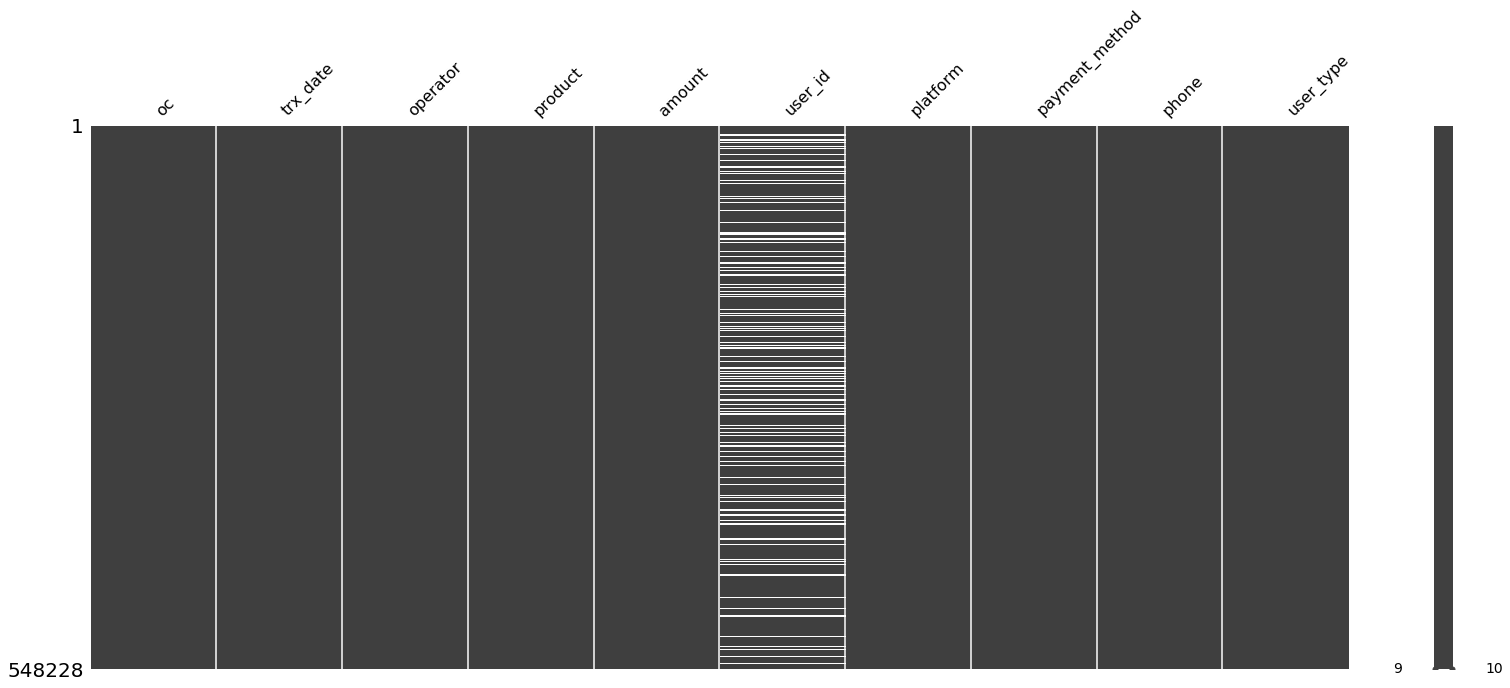

In [31]:
msno.matrix(df.sample(frac=.1));

Se aprecia que la variable `user_id` es la única que presenta valores nulos hasta este punto del estudio

A continuación se detalla una inspección preliminar de cada una de las variables existentes

In [32]:
afx.analizar_variables(df);

Variables numéricas


amount
count 5482276.00000
mean     3625.27357
std      3093.01165
min       100.00000
25%      2000.00000
50%      3000.00000
75%      5000.00000
max     30000.00000


--------------------------------------------------------------------------------

Variables no numéricas


oc    trx_date operator    product                       user_id platform payment_method                         phone       user_type
count    5482276     5482276  5482276    5482276                       4577290  5482276        5482276                       5482276         5482276
unique   5482276         517        6          4                       1030146        2              4                       1812861               3
top     16777215  2019-05-31     at&t  service_1  6OicOLYzSq5UAXk1T0eVLiHKqgg=   mobile         webpay  pWeRf3jummnPCQdA7SHYkIF2vKA=  semiregistrado
freq           1       20488  1716532    4757246                         18342  4127676        5444638                           462         3755262

oc       %
16777215   1 0.00000
11179252   1 0.00000
11179255   1 0.00000
11179256   1 0.00000
11179257   1 0.00000
...       ..     ...
13967112   1 0.00000
13967113   1 0.00000
13967114   1 0.00000
10390270   1 0.00000
16777218   1 0.00000

[5482276 rows x 2 columns]

trx_date       %
2019-05-31     20488 0.00374
2019-02-28     17811 0.00325
2019-01-31     17147 0.00313
2019-07-31     16503 0.00301
2019-04-30     16439 0.00300
...              ...     ...
2020-03-21      7135 0.00130
2019-08-25      7106 0.00130
2019-10-13      6909 0.00126
2020-03-29      6165 0.00112
2019-10-25      5938 0.00108

[517 rows x 2 columns]

operator       %
at&t              1716532 0.31311
access-wireless   1131967 0.20648
vodafone          1083064 0.19756
verizone           733980 0.13388
t-mobile           663873 0.12109
otro               152860 0.02788

product       %
service_1  4757246 0.86775
service_2   668863 0.12200
service_3    28630 0.00522
service_4    27537 0.00502

user_id       %
6OicOLYzSq5UAXk1T0eVLiHKqgg=    18342 0.00401
yItFHbrRAeGtZEV6APqy0LRLifc=     3201 0.00070
SdSZuz3ApZHpyA4chj40gfdH9fU=     1869 0.00041
E7p+e+nlgf1N8/l61lJFBBaC6EM=     1736 0.00038
zuEf/z2YFiZabKtQjZCSviUMCZY=     1600 0.00035
...                               ...     ...
amrdJrAzm6Kp2GB3JmlCs/WjJ2s=        1 0.00000
8m2cG1YSQPLVAlyz8O7IGMdXjO8=        1 0.00000
wRUrpmQ87zkvzREh97Uxkwra2To=        1 0.00000
VOWsSgYAyKS0yBUIMNXksuMgP6M=        1 0.00000
9ZbrUtSybhOKrYhy1GsFqRPq/HI=        1 0.00000

[1030146 rows x 2 columns]

platform       %
mobile    4127676 0.75291
desktop   1354600 0.24709

payment_method       %
webpay            5444638 0.99313
puntos              19426 0.00354
unknown             11088 0.00202
one-click            7124 0.00130

phone       %
pWeRf3jummnPCQdA7SHYkIF2vKA=    462 0.00008
SdMqcuLJ0YQShAL/JlpmU7K0yV8=    294 0.00005
LNIS/k3C7nd/cEtvODOjp5t+91U=    226 0.00004
A2Hf62C+X3DUzrox66Ds0R7YNtU=    208 0.00004
ZiyBLHAOVPcP2sNlxrHqunVOnbo=    203 0.00004
...                             ...     ...
8eXntbmUyqtRMhQ/ZAu3ujmbD6g=      1 0.00000
3R4fr+Dv7Zq/cDd6mvP5KZ31nr0=      1 0.00000
QbW2ZyxyOxEkSB2B8qIzFDlqWiM=      1 0.00000
M1KM/jVywo6BJF+brBsB6sSjnK0=      1 0.00000
gm0v6FJzptkBWmX4AgcVqMiuNIQ=      1 0.00000

[1812861 rows x 2 columns]

user_type       %
semiregistrado    3755262 0.68498
anónimo            904986 0.16507
registrado         822028 0.14994


--------------------------------------------------------------------------------

Cantidad de valores nulos


oc                     0
trx_date               0
operator               0
product                0
amount                 0
user_id           904986
platform               0
payment_method         0
phone                  0
user_type              0
dtype: int64

**Inspección Gráfica de las variables**

In [33]:
afx.inspeccion_visual(df);

Se procede a visualizar la distribución de la variable númerica `amount`

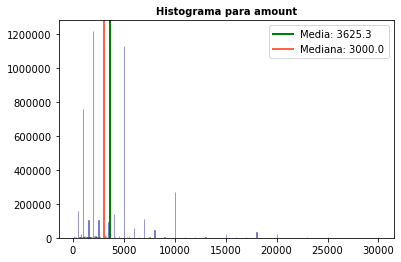

In [34]:
afx.plot_hist(df, 'amount');

* Se aprecia que los montos están agrupados hacia la izquierda y que son discretos.  
* La mediana es de \$3000 pesos  
* Los montos que más se repiten son:  
    * \$2000 con 22.2%
    * \$5000 con 20.8%
    * \$3000 con 16.1%
    * \$1000 con 13.8%
* En función de la problemática existente, no será necesario aplicar algún tipo de transformación a esta variable  
    

## Observaciones

En función de los resultados previamente obtenidos se pueden apreciar los siguientes aspectos:

* Se observan 5,482,276 registros de transacciones.
* **oc**: corresponde al identificador de la transacción de compra. Se aprecia solo una transacción por id, por lo que son valores únicos y no es una variable útil. Se puede borrar.
* **trx_date**: es un string con la fecha en el formato yyyy-mm-dd. Hay 517 días con transacciones que van desde 5900 como mínimo a más de 20000 transacciones diarias.
* **operator**: existen 10 operadores distintos. Los que registran más transacciones son `at&t` (31%), `access-wireless` (21%) y `vodafone` (20%).
* **product**: se presentan 4 tipos de productos. El principal es `service_1` (87%) y lo sigue `service_2` (12%).
* **amount**: los montos son generalmente valores cerrados con una mediana de 3000 pesos.
* **user_id**: se aprecian 904,986 valores nulos. Existen 1,030,146 correos distintos. El que tiene más transacciones acumula 18,342 con 0.4%
* **platform**: hay 2 plataformas: `mobile` (75%) y `desktop` (25%).
* **payment_method**: se obtuvieron 4 medios de pago. El principal es `webpay` (99%).
* **phone**: hay 1,812,861 teléfonos distintos. El que tiene más transacciones acumula 462.
* **user_type**: hay 3 tipo de usuario. Estos son `semiregistrado` (69%), `anónimo` (16%) y `registrado` (15%).